In [69]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
path="/Users/z88756212/Documents/影像演算法/python/dogs-vs-cats"
print(os.listdir(path))

import random
from PIL import Image
from sklearn.model_selection import train_test_split


['.DS_Store', 'sampleSubmission.csv', 'test1', 'train', '.ipynb_checkpoints', 'Cats and dogs.ipynb']


In [70]:
filenames = os.listdir("/Users/z88756212/Documents/影像演算法/python/dogs-vs-cats/train")
data = []
for filename in filenames:
    
    if "cat" in filename:
        label = "cat"
    elif "dog" in filename:
        label = "dog"
    else:
        label = "unknown" 

    data.append({"filename": filename, "label": label})

df = pd.DataFrame(data)

print(df)

            filename label
0       dog.8011.jpg   dog
1       cat.5077.jpg   cat
2       dog.7322.jpg   dog
3       cat.2718.jpg   cat
4      cat.10151.jpg   cat
...              ...   ...
24995   dog.8008.jpg   dog
24996   dog.1992.jpg   dog
24997  dog.12412.jpg   dog
24998   cat.2701.jpg   cat
24999  cat.10148.jpg   cat

[25000 rows x 2 columns]


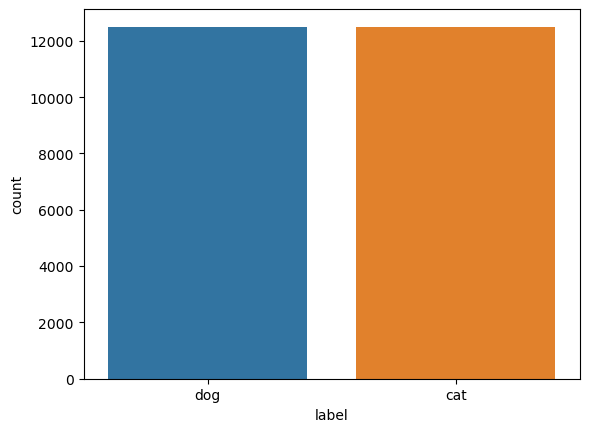

In [71]:
sns.countplot(x="label", data=df); 

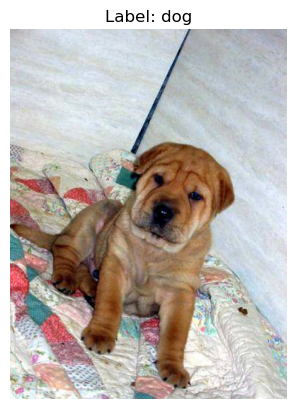

In [72]:
image_dir = "/Users/z88756212/Documents/影像演算法/python/dogs-vs-cats/train"
random_row = df.sample(n=1).iloc[0] 
image_path = os.path.join(image_dir, random_row["filename"])
label = random_row["label"]


img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Label: {label}")
plt.axis("off")  
plt.show()

In [76]:
label_map = {'dog': 1, 'cat': 0}
df['label'] = df['label'].map(label_map).astype(str)
print(df.head())

        filename label
0   dog.8011.jpg     1
1   cat.5077.jpg     0
2   dog.7322.jpg     1
3   cat.2718.jpg     0
4  cat.10151.jpg     0


In [77]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: >

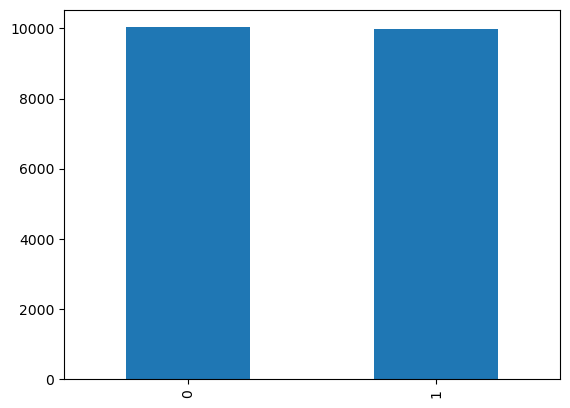

In [78]:
train_df['label'].value_counts().plot.bar()

<Axes: >

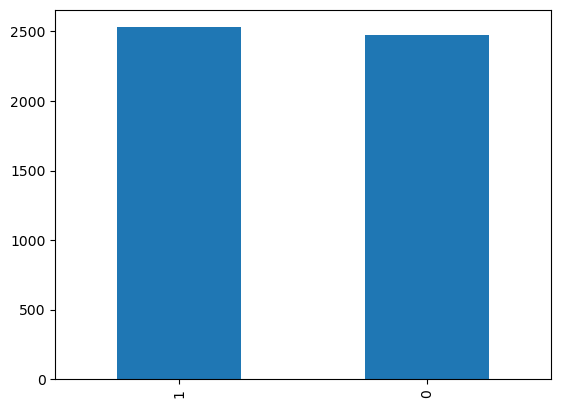

In [79]:
validate_df['label'].value_counts().plot.bar()

In [80]:
train_df,validate_df

(            filename label
 0      cat.11282.jpg     0
 1       cat.7693.jpg     0
 2       cat.4977.jpg     0
 3       dog.9403.jpg     1
 4      cat.10150.jpg     0
 ...              ...   ...
 19995   dog.2721.jpg     1
 19996   dog.3974.jpg     1
 19997  dog.10427.jpg     1
 19998    cat.731.jpg     0
 19999   dog.6540.jpg     1
 
 [20000 rows x 2 columns],
            filename label
 0      cat.1474.jpg     0
 1     dog.11287.jpg     1
 2      dog.8276.jpg     1
 3      cat.7227.jpg     0
 4      cat.2997.jpg     0
 ...             ...   ...
 4995   cat.7991.jpg     0
 4996   dog.9208.jpg     1
 4997   cat.5676.jpg     0
 4998   cat.9901.jpg     0
 4999   dog.9535.jpg     1
 
 [5000 rows x 2 columns])

# 資料擴增

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, #隨機應用剪切變換
    zoom_range=0.2, # 隨機縮放圖像
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_dataframe(
    validate_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [83]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling
from keras.layers import Conv2D , MaxPooling2D , Dropout, Flatten , Dense, Activation


model = Sequential()
model.add(Rescaling(1.0/255,input_shape=(180, 180, 3)))
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax', kernel_initializer="he_normal"))

/Users/z88756212/anaconda3/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 85, 85, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 38, 38, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 46208)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │     2,957,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,237,249 (12.35 MB)

 Trainable params: 3,237,249 (12.35 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [84]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=valid_generator)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1884s 3s/step - accuracy: 0.5039 - loss: 0.6935 - val_accuracy: 0.5056 - val_loss: 0.6934
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 848s 1s/step - accuracy: 0.4941 - loss: 0.6931 - val_accuracy: 0.5056 - val_loss: 0.6931
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 406s 649ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.5056 - val_loss: 0.6931
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 410s 656ms/step - accuracy: 0.4944 - loss: 0.6934 - val_accuracy: 0.5056 - val_loss: 0.6932
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 408s 652ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.5056 - val_loss: 0.6931
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 459s 733ms/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.5056 - val_loss: 0.6932
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 436s 698ms/step - accuracy: 0.4938 - loss: 0.6931 - val_accuracy: 0.5056 - val_loss: 0.6932
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 359s 574ms/step - accuracy: 0.5021 - loss

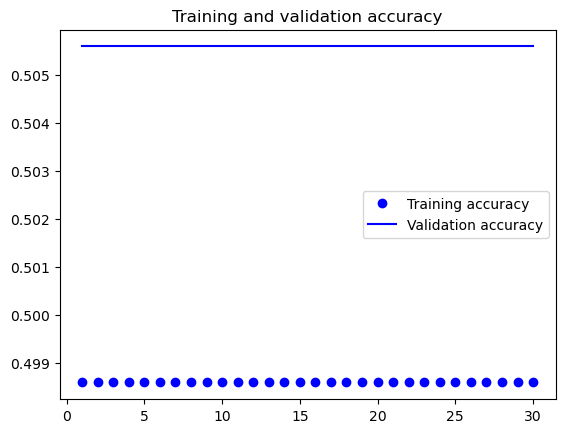

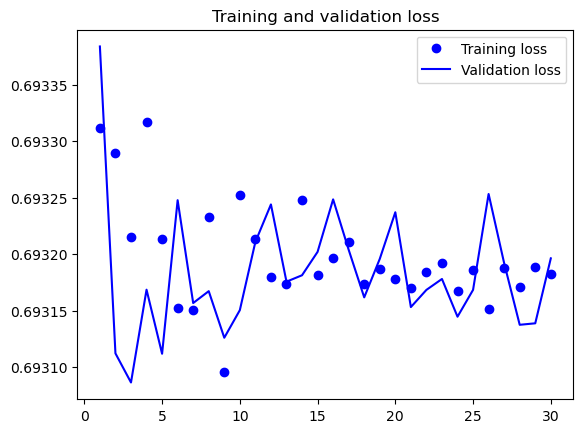

In [87]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# 資料擴增2

In [145]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, #隨機應用剪切變換
    zoom_range=0.2, # 隨機縮放圖像
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_dataframe(
    validate_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [146]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling
from keras.layers import  BatchNormalization , Conv2D , MaxPooling2D , Dropout, Flatten , Dense, Activation
from tensorflow.keras.optimizers import Adam



model = Sequential()
model.add(Rescaling(1.0/255,input_shape=(180, 180, 3)))
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.5))  # 增加正則化
model.add(Dense(128, activation='relu', kernel_initializer="he_normal"))  # 增加全連接層，提升模型表達能力
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_initializer="he_normal"))



model.compile(
    optimizer=Adam(learning_rate=1e-4),                 # 使用 Adam 優化器
    loss='binary_crossentropy',       # 二分類的損失函數
    metrics=['accuracy']              # 監控準確率
)

In [147]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_21 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_74 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 18, 18, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,044,801 (11.61 MB)

 Trainable params: 3,043,841 (11.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [148]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
]
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=valid_generator,
    callbacks=callbacks
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 387s 617ms/step - accuracy: 0.5747 - loss: 0.8679 - val_accuracy: 0.5740 - val_loss: 0.9237 - learning_rate: 1.0000e-04
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 382s 611ms/step - accuracy: 0.6459 - loss: 0.6243 - val_accuracy: 0.6454 - val_loss: 0.6097 - learning_rate: 1.0000e-04
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 378s 604ms/step - accuracy: 0.6875 - loss: 0.5887 - val_accuracy: 0.7134 - val_loss: 0.5524 - learning_rate: 1.0000e-04
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 407s 651ms/step - accuracy: 0.7021 - loss: 0.5663 - val_accuracy: 0.5402 - val_loss: 0.6862 - learning_rate: 1.0000e-04
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 410s 655ms/step - accuracy: 0.7266 - loss: 0.5339 - val_accuracy: 0.7170 - val_loss: 0.5638 - learning_rate: 1.0000e-04
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 389s 622ms/step - accuracy: 0.7352 - loss: 0.5287 - val_accuracy: 0.6432 - val_loss: 0.6449 - learning_rate: 1.0000e-04
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 

In [184]:
# 儲存模型為原生的 Keras 格式 (.keras)
model.save('path_to_save_model/my_model.keras')

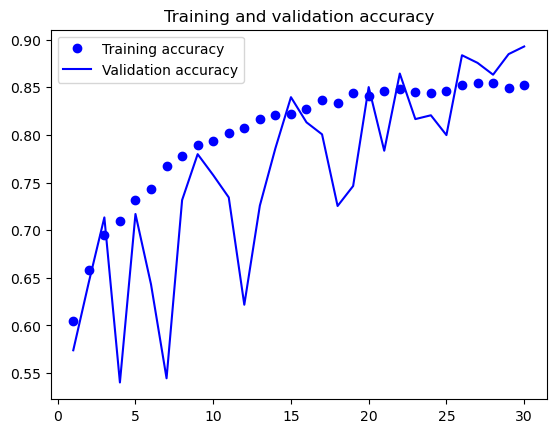

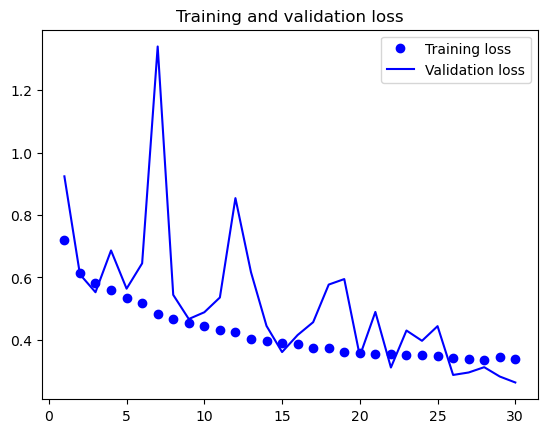

In [149]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [189]:
filenames1 = os.listdir("/Users/z88756212/Documents/影像演算法/python/dogs-vs-cats/test1")
test_df = pd.DataFrame({
    'filename': filenames1
})
test_df1 = test_df.shape[0]
test_df

,filename
0,9733.jpg
1,63.jpg
2,6400.jpg
3,823.jpg
4,4217.jpg
...,...
12495,3561.jpg
12496,8434.jpg
12497,7707.jpg
12498,6419.jpg


In [170]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/Users/z88756212/Documents/影像演算法/python/dogs-vs-cats/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(180, 180),
    batch_size=32,
    shuffle=False
)

Found 12500 validated image filenames.


In [192]:
from tensorflow.keras.models import load_model


model = load_model('path_to_save_model/my_model.keras')  # 替換為您的模型路徑
predictions = model.predict(test_generator, verbose=1)

print(predictions)




2025-01-06 19:13:53.803166: W tensorflow/core/framework/op_kernel.cc:1827] INVALID_ARGUMENT: TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32,), but the yielded element was [[[[0.7490196  0.6901961  0.6156863 ]
   [0.7607844  0.7019608  0.627451  ]
   [0.7607844  0.7019608  0.627451  ]
   ...
   [0.18431373 0.21960786 0.28627452]
   [0.21960786 0.24313727 0.29803923]
   [0.32941177 0.31764707 0.3529412 ]]

  [[0.7607844  0.7019608  0.627451  ]
   [0.7686275  0.70980394 0.63529414]
   [0.76470596 0.7058824  0.6313726 ]
   ...
   [0.19215688 0.24313727 0.30980393]
   [0.19607845 0.23137257 0.2901961 ]
   [0.29411766 0.29411766 0.34117648]]

  [[0.7607844  0.7019608  0.627451  ]
   [0.76470596 0.7058824  0.6313726 ]
   [0.7568628  0.69803923 0.62352943]
   ...
   [0.20000002 0.25882354 0.34117648]
   [0.18823531 0.23137257 0.3019608 ]
   [0.21568629 0.24705884 0.29803923]]

  ...

  [[0.2901961  0.38431376 0.478431

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32,), but the yielded element was [[[[0.7490196  0.6901961  0.6156863 ]
   [0.7607844  0.7019608  0.627451  ]
   [0.7607844  0.7019608  0.627451  ]
   ...
   [0.18431373 0.21960786 0.28627452]
   [0.21960786 0.24313727 0.29803923]
   [0.32941177 0.31764707 0.3529412 ]]

  [[0.7607844  0.7019608  0.627451  ]
   [0.7686275  0.70980394 0.63529414]
   [0.76470596 0.7058824  0.6313726 ]
   ...
   [0.19215688 0.24313727 0.30980393]
   [0.19607845 0.23137257 0.2901961 ]
   [0.29411766 0.29411766 0.34117648]]

  [[0.7607844  0.7019608  0.627451  ]
   [0.76470596 0.7058824  0.6313726 ]
   [0.7568628  0.69803923 0.62352943]
   ...
   [0.20000002 0.25882354 0.34117648]
   [0.18823531 0.23137257 0.3019608 ]
   [0.21568629 0.24705884 0.29803923]]

  ...

  [[0.2901961  0.38431376 0.4784314 ]
   [0.32941177 0.40784317 0.5058824 ]
   [0.24313727 0.30980393 0.41960788]
   ...
   [0.18823531 0.19215688 0.17254902]
   [0.19607845 0.20392159 0.18431373]
   [0.12156864 0.11764707 0.10980393]]

  [[0.30980393 0.4039216  0.49803925]
   [0.2901961  0.36862746 0.4666667 ]
   [0.32941177 0.39607847 0.5058824 ]
   ...
   [0.13725491 0.14117648 0.12156864]
   [0.1254902  0.13333334 0.1137255 ]
   [0.09411766 0.09019608 0.08235294]]

  [[0.28627452 0.3803922  0.47450984]
   [0.3254902  0.4039216  0.5019608 ]
   [0.3372549  0.4039216  0.5137255 ]
   ...
   [0.16470589 0.16862746 0.14901961]
   [0.12156864 0.12941177 0.10980393]
   [0.09411766 0.09019608 0.08235294]]]


 [[[0.01568628 0.01176471 0.00392157]
   [0.01568628 0.01176471 0.00392157]
   [0.01568628 0.01176471 0.00392157]
   ...
   [0.6509804  0.5764706  0.58431375]
   [0.5764706  0.49803925 0.5058824 ]
   [0.5921569  0.5137255  0.52156866]]

  [[0.01568628 0.01176471 0.00392157]
   [0.01568628 0.01176471 0.00392157]
   [0.01568628 0.01176471 0.00392157]
   ...
   [0.6117647  0.5411765  0.53333336]
   [0.62352943 0.54509807 0.5411765 ]
   [0.67058825 0.5921569  0.5882353 ]]

  [[0.01568628 0.01176471 0.00392157]
   [0.01568628 0.01176471 0.00392157]
   [0.01568628 0.01176471 0.00392157]
   ...
   [0.654902   0.5803922  0.5529412 ]
   [0.70980394 0.6313726  0.6039216 ]
   [0.7372549  0.65882355 0.6313726 ]]

  ...

  [[0.63529414 0.654902   0.6392157 ]
   [0.6784314  0.69803923 0.68235296]
   [0.7294118  0.7490196  0.73333335]
   ...
   [0.1764706  0.21176472 0.20784315]
   [0.16862746 0.20392159 0.20000002]
   [0.16470589 0.20000002 0.19607845]]

  [[0.5686275  0.5882353  0.57254905]
   [0.6392157  0.65882355 0.6431373 ]
   [0.7019608  0.72156864 0.7058824 ]
   ...
   [0.14901961 0.18431373 0.18039216]
   [0.14901961 0.18431373 0.18039216]
   [0.14509805 0.18039216 0.1764706 ]]

  [[0.57254905 0.5921569  0.5764706 ]
   [0.6313726  0.6509804  0.63529414]
   [0.6666667  0.6862745  0.67058825]
   ...
   [0.12156864 0.15686275 0.15294118]
   [0.13333334 0.16862746 0.16470589]
   [0.14509805 0.18039216 0.1764706 ]]]


 [[[0.48627454 0.46274513 0.4156863 ]
   [0.5058824  0.49803925 0.40784317]
   [0.5411765  0.5372549  0.41960788]
   ...
   [0.8745099  0.8862746  0.9450981 ]
   [0.70980394 0.7411765  0.7843138 ]
   [0.50980395 0.6156863  0.6431373 ]]

  [[0.47450984 0.4666667  0.40784317]
   [0.48627454 0.48627454 0.3921569 ]
   [0.5058824  0.52156866 0.3921569 ]
   ...
   [0.8352942  0.8588236  0.9058824 ]
   [0.58431375 0.63529414 0.67058825]
   [0.6784314  0.74509805 0.7725491 ]]

  [[0.5372549  0.54901963 0.4666667 ]
   [0.43137258 0.45098042 0.33333334]
   [0.48627454 0.5137255  0.3803922 ]
   ...
   [0.654902   0.69411767 0.73333335]
   [0.5294118  0.59607846 0.627451  ]
   [0.6901961  0.7411765  0.7725491 ]]

  ...

  [[0.53333336 0.54509807 0.4784314 ]
   [0.54901963 0.5764706  0.5137255 ]
   [0.52156866 0.5568628  0.4901961 ]
   ...
   [0.49803925 0.49411768 0.5137255 ]
   [0.48627454 0.48235297 0.5019608 ]
   [0.5568628  0.5529412  0.58431375]]

  [[0.47058827 0.48235297 0.4156863 ]
   [0.5568628  0.58431375 0.52156866]
   [0.5294118  0.5647059  0.49803925]
   ...
   [0.5372549  0.53333336 0.5529412 ]
   [0.5176471  0.5137255  0.53333336]
   [0.57254905 0.5686275  0.6       ]]

  [[0.61960787 0.6313726  0.5647059 ]
   [0.5137255  0.5411765  0.4784314 ]
   [0.48627454 0.52156866 0.454902  ]
   ...
   [0.54901963 0.54509807 0.5647059 ]
   [0.54901963 0.54509807 0.5647059 ]
   [0.57254905 0.5686275  0.6       ]]]


 ...


 [[[0.45098042 0.4431373  0.44705886]
   [0.4431373  0.43529415 0.43921572]
   [0.43921572 0.43137258 0.43529415]
   ...
   [0.47450984 0.48235297 0.47058827]
   [0.47450984 0.48235297 0.47058827]
   [0.47450984 0.48235297 0.47058827]]

  [[0.4039216  0.39607847 0.40000004]
   [0.4666667  0.45882356 0.46274513]
   [0.454902   0.44705886 0.45098042]
   ...
   [0.47450984 0.48235297 0.47058827]
   [0.47450984 0.48235297 0.47058827]
   [0.47450984 0.48235297 0.47058827]]

  [[0.45882356 0.45098042 0.454902  ]
   [0.47450984 0.4666667  0.47058827]
   [0.4666667  0.45882356 0.46274513]
   ...
   [0.4784314  0.48627454 0.47450984]
   [0.4784314  0.48627454 0.47450984]
   [0.4784314  0.48627454 0.47450984]]

  ...

  [[0.56078434 0.36862746 0.54509807]
   [0.427451   0.24313727 0.4156863 ]
   [0.5372549  0.3529412  0.5254902 ]
   ...
   [0.4431373  0.31764707 0.41176474]
   [0.47058827 0.34509805 0.43529415]
   [0.4784314  0.34509805 0.4431373 ]]

  [[0.5058824  0.3137255  0.4901961 ]
   [0.5764706  0.3921569  0.5647059 ]
   [0.56078434 0.37647063 0.54901963]
   ...
   [0.5294118  0.4039216  0.49411768]
   [0.54901963 0.42352945 0.5058824 ]
   [0.49411768 0.35686275 0.47450984]]

  [[0.5803922  0.38823533 0.5647059 ]
   [0.5176471  0.33333334 0.5058824 ]
   [0.56078434 0.37647063 0.54901963]
   ...
   [0.49803925 0.37254903 0.46274513]
   [0.45098042 0.3254902  0.4156863 ]
   [0.48235297 0.34117648 0.48235297]]]


 [[[0.01176471 0.01176471 0.01176471]
   [0.01176471 0.01176471 0.01176471]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.10980393 0.0509804  0.03137255]
   [0.10980393 0.0509804  0.03137255]
   [0.10980393 0.0509804  0.03137255]]

  [[0.01176471 0.01176471 0.01176471]
   [0.01176471 0.01176471 0.01176471]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.10980393 0.0509804  0.03137255]
   [0.10980393 0.0509804  0.03137255]
   [0.10980393 0.0509804  0.03137255]]

  [[0.01176471 0.01176471 0.01176471]
   [0.01176471 0.01176471 0.01176471]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.10980393 0.0509804  0.03137255]
   [0.10980393 0.0509804  0.03137255]
   [0.10980393 0.0509804  0.03137255]]

  ...

  [[0.08627451 0.14117648 0.14509805]
   [0.07450981 0.12941177 0.13333334]
   [0.08627451 0.14117648 0.14509805]
   ...
   [0.05882353 0.03921569 0.02745098]
   [0.05882353 0.03921569 0.02745098]
   [0.05490196 0.03529412 0.02352941]]

  [[0.08235294 0.13725491 0.14117648]
   [0.07058824 0.1254902  0.12941177]
   [0.08235294 0.13725491 0.14117648]
   ...
   [0.05882353 0.03921569 0.02745098]
   [0.05490196 0.03529412 0.02352941]
   [0.05490196 0.03529412 0.02352941]]

  [[0.06666667 0.12156864 0.1254902 ]
   [0.05490196 0.10980393 0.1137255 ]
   [0.06666667 0.12156864 0.1254902 ]
   ...
   [0.05490196 0.03529412 0.02352941]
   [0.0509804  0.03137255 0.01960784]
   [0.0509804  0.03137255 0.01960784]]]


 [[[0.45882356 0.4039216  0.36862746]
   [0.43529415 0.3803922  0.34509805]
   [0.42352945 0.36862746 0.33333334]
   ...
   [0.05882353 0.02352941 0.03529412]
   [0.05882353 0.02352941 0.03529412]
   [0.05882353 0.02352941 0.03529412]]

  [[0.47450984 0.41960788 0.38431376]
   [0.4431373  0.38823533 0.3529412 ]
   [0.43137258 0.37647063 0.34117648]
   ...
   [0.05882353 0.02352941 0.03529412]
   [0.05882353 0.02352941 0.03529412]
   [0.05882353 0.02352941 0.03529412]]

  [[0.4784314  0.42352945 0.38823533]
   [0.45098042 0.39607847 0.36078432]
   [0.43529415 0.3803922  0.34509805]
   ...
   [0.05490196 0.01960784 0.03137255]
   [0.05490196 0.01960784 0.03137255]
   [0.05490196 0.01960784 0.03137255]]

  ...

  [[0.7607844  0.6627451  0.6431373 ]
   [0.76470596 0.6666667  0.64705884]
   [0.7686275  0.67058825 0.6509804 ]
   ...
   [0.7176471  0.6392157  0.63529414]
   [0.7254902  0.64705884 0.6431373 ]
   [0.7294118  0.6509804  0.64705884]]

  [[0.75294125 0.654902   0.63529414]
   [0.7568628  0.65882355 0.6392157 ]
   [0.7607844  0.6627451  0.6431373 ]
   ...
   [0.7176471  0.6392157  0.63529414]
   [0.72156864 0.6431373  0.6392157 ]
   [0.7294118  0.6509804  0.64705884]]

  [[0.76470596 0.6666667  0.64705884]
   [0.76470596 0.6666667  0.64705884]
   [0.76470596 0.6666667  0.64705884]
   ...
   [0.72156864 0.6431373  0.6392157 ]
   [0.7176471  0.6392157  0.63529414]
   [0.7294118  0.6509804  0.64705884]]]].
Traceback (most recent call last):

  File "/Users/z88756212/anaconda3/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 204, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)

  File "/Users/z88756212/anaconda3/lib/python3.10/site-packages/tensorflow/python/data/util/nest.py", line 237, in flatten_up_to
    return nest_util.flatten_up_to(

  File "/Users/z88756212/anaconda3/lib/python3.10/site-packages/tensorflow/python/util/nest_util.py", line 1542, in flatten_up_to
    return _tf_data_flatten_up_to(shallow_tree, input_tree)

  File "/Users/z88756212/anaconda3/lib/python3.10/site-packages/tensorflow/python/util/nest_util.py", line 1571, in _tf_data_flatten_up_to
    _tf_data_assert_shallow_structure(shallow_tree, input_tree)

  File "/Users/z88756212/anaconda3/lib/python3.10/site-packages/tensorflow/python/util/nest_util.py", line 1415, in _tf_data_assert_shallow_structure
    raise TypeError(

TypeError: If shallow structure is a sequence, input must also be a sequence. Input has type: 'ndarray'.


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/Users/z88756212/anaconda3/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/Users/z88756212/anaconda3/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/Users/z88756212/anaconda3/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 206, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32,), but the yielded element was [[[[0.7490196  0.6901961  0.6156863 ]
   [0.7607844  0.7019608  0.627451  ]
   [0.7607844  0.7019608  0.627451  ]
   ...
   [0.18431373 0.21960786 0.28627452]
   [0.21960786 0.24313727 0.29803923]
   [0.32941177 0.31764707 0.3529412 ]]

  [[0.7607844  0.7019608  0.627451  ]
   [0.7686275  0.70980394 0.63529414]
   [0.76470596 0.7058824  0.6313726 ]
   ...
   [0.19215688 0.24313727 0.30980393]
   [0.19607845 0.23137257 0.2901961 ]
   [0.29411766 0.29411766 0.34117648]]

  [[0.7607844  0.7019608  0.627451  ]
   [0.76470596 0.7058824  0.6313726 ]
   [0.7568628  0.69803923 0.62352943]
   ...
   [0.20000002 0.25882354 0.34117648]
   [0.18823531 0.23137257 0.3019608 ]
   [0.21568629 0.24705884 0.29803923]]

  ...

  [[0.2901961  0.38431376 0.4784314 ]
   [0.32941177 0.40784317 0.5058824 ]
   [0.24313727 0.30980393 0.41960788]
   ...
   [0.18823531 0.19215688 0.17254902]
   [0.19607845 0.20392159 0.18431373]
   [0.12156864 0.11764707 0.10980393]]

  [[0.30980393 0.4039216  0.49803925]
   [0.2901961  0.36862746 0.4666667 ]
   [0.32941177 0.39607847 0.5058824 ]
   ...
   [0.13725491 0.14117648 0.12156864]
   [0.1254902  0.13333334 0.1137255 ]
   [0.09411766 0.09019608 0.08235294]]

  [[0.28627452 0.3803922  0.47450984]
   [0.3254902  0.4039216  0.5019608 ]
   [0.3372549  0.4039216  0.5137255 ]
   ...
   [0.16470589 0.16862746 0.14901961]
   [0.12156864 0.12941177 0.10980393]
   [0.09411766 0.09019608 0.08235294]]]


 [[[0.01568628 0.01176471 0.00392157]
   [0.01568628 0.01176471 0.00392157]
   [0.01568628 0.01176471 0.00392157]
   ...
   [0.6509804  0.5764706  0.58431375]
   [0.5764706  0.49803925 0.5058824 ]
   [0.5921569  0.5137255  0.52156866]]

  [[0.01568628 0.01176471 0.00392157]
   [0.01568628 0.01176471 0.00392157]
   [0.01568628 0.01176471 0.00392157]
   ...
   [0.6117647  0.5411765  0.53333336]
   [0.62352943 0.54509807 0.5411765 ]
   [0.67058825 0.5921569  0.5882353 ]]

  [[0.01568628 0.01176471 0.00392157]
   [0.01568628 0.01176471 0.00392157]
   [0.01568628 0.01176471 0.00392157]
   ...
   [0.654902   0.5803922  0.5529412 ]
   [0.70980394 0.6313726  0.6039216 ]
   [0.7372549  0.65882355 0.6313726 ]]

  ...

  [[0.63529414 0.654902   0.6392157 ]
   [0.6784314  0.69803923 0.68235296]
   [0.7294118  0.7490196  0.73333335]
   ...
   [0.1764706  0.21176472 0.20784315]
   [0.16862746 0.20392159 0.20000002]
   [0.16470589 0.20000002 0.19607845]]

  [[0.5686275  0.5882353  0.57254905]
   [0.6392157  0.65882355 0.6431373 ]
   [0.7019608  0.72156864 0.7058824 ]
   ...
   [0.14901961 0.18431373 0.18039216]
   [0.14901961 0.18431373 0.18039216]
   [0.14509805 0.18039216 0.1764706 ]]

  [[0.57254905 0.5921569  0.5764706 ]
   [0.6313726  0.6509804  0.63529414]
   [0.6666667  0.6862745  0.67058825]
   ...
   [0.12156864 0.15686275 0.15294118]
   [0.13333334 0.16862746 0.16470589]
   [0.14509805 0.18039216 0.1764706 ]]]


 [[[0.48627454 0.46274513 0.4156863 ]
   [0.5058824  0.49803925 0.40784317]
   [0.5411765  0.5372549  0.41960788]
   ...
   [0.8745099  0.8862746  0.9450981 ]
   [0.70980394 0.7411765  0.7843138 ]
   [0.50980395 0.6156863  0.6431373 ]]

  [[0.47450984 0.4666667  0.40784317]
   [0.48627454 0.48627454 0.3921569 ]
   [0.5058824  0.52156866 0.3921569 ]
   ...
   [0.8352942  0.8588236  0.9058824 ]
   [0.58431375 0.63529414 0.67058825]
   [0.6784314  0.74509805 0.7725491 ]]

  [[0.5372549  0.54901963 0.4666667 ]
   [0.43137258 0.45098042 0.33333334]
   [0.48627454 0.5137255  0.3803922 ]
   ...
   [0.654902   0.69411767 0.73333335]
   [0.5294118  0.59607846 0.627451  ]
   [0.6901961  0.7411765  0.7725491 ]]

  ...

  [[0.53333336 0.54509807 0.4784314 ]
   [0.54901963 0.5764706  0.5137255 ]
   [0.52156866 0.5568628  0.4901961 ]
   ...
   [0.49803925 0.49411768 0.5137255 ]
   [0.48627454 0.48235297 0.5019608 ]
   [0.5568628  0.5529412  0.58431375]]

  [[0.47058827 0.48235297 0.4156863 ]
   [0.5568628  0.58431375 0.52156866]
   [0.5294118  0.5647059  0.49803925]
   ...
   [0.5372549  0.53333336 0.5529412 ]
   [0.5176471  0.5137255  0.53333336]
   [0.57254905 0.5686275  0.6       ]]

  [[0.61960787 0.6313726  0.5647059 ]
   [0.5137255  0.5411765  0.4784314 ]
   [0.48627454 0.52156866 0.454902  ]
   ...
   [0.54901963 0.54509807 0.5647059 ]
   [0.54901963 0.54509807 0.5647059 ]
   [0.57254905 0.5686275  0.6       ]]]


 ...


 [[[0.45098042 0.4431373  0.44705886]
   [0.4431373  0.43529415 0.43921572]
   [0.43921572 0.43137258 0.43529415]
   ...
   [0.47450984 0.48235297 0.47058827]
   [0.47450984 0.48235297 0.47058827]
   [0.47450984 0.48235297 0.47058827]]

  [[0.4039216  0.39607847 0.40000004]
   [0.4666667  0.45882356 0.46274513]
   [0.454902   0.44705886 0.45098042]
   ...
   [0.47450984 0.48235297 0.47058827]
   [0.47450984 0.48235297 0.47058827]
   [0.47450984 0.48235297 0.47058827]]

  [[0.45882356 0.45098042 0.454902  ]
   [0.47450984 0.4666667  0.47058827]
   [0.4666667  0.45882356 0.46274513]
   ...
   [0.4784314  0.48627454 0.47450984]
   [0.4784314  0.48627454 0.47450984]
   [0.4784314  0.48627454 0.47450984]]

  ...

  [[0.56078434 0.36862746 0.54509807]
   [0.427451   0.24313727 0.4156863 ]
   [0.5372549  0.3529412  0.5254902 ]
   ...
   [0.4431373  0.31764707 0.41176474]
   [0.47058827 0.34509805 0.43529415]
   [0.4784314  0.34509805 0.4431373 ]]

  [[0.5058824  0.3137255  0.4901961 ]
   [0.5764706  0.3921569  0.5647059 ]
   [0.56078434 0.37647063 0.54901963]
   ...
   [0.5294118  0.4039216  0.49411768]
   [0.54901963 0.42352945 0.5058824 ]
   [0.49411768 0.35686275 0.47450984]]

  [[0.5803922  0.38823533 0.5647059 ]
   [0.5176471  0.33333334 0.5058824 ]
   [0.56078434 0.37647063 0.54901963]
   ...
   [0.49803925 0.37254903 0.46274513]
   [0.45098042 0.3254902  0.4156863 ]
   [0.48235297 0.34117648 0.48235297]]]


 [[[0.01176471 0.01176471 0.01176471]
   [0.01176471 0.01176471 0.01176471]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.10980393 0.0509804  0.03137255]
   [0.10980393 0.0509804  0.03137255]
   [0.10980393 0.0509804  0.03137255]]

  [[0.01176471 0.01176471 0.01176471]
   [0.01176471 0.01176471 0.01176471]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.10980393 0.0509804  0.03137255]
   [0.10980393 0.0509804  0.03137255]
   [0.10980393 0.0509804  0.03137255]]

  [[0.01176471 0.01176471 0.01176471]
   [0.01176471 0.01176471 0.01176471]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.10980393 0.0509804  0.03137255]
   [0.10980393 0.0509804  0.03137255]
   [0.10980393 0.0509804  0.03137255]]

  ...

  [[0.08627451 0.14117648 0.14509805]
   [0.07450981 0.12941177 0.13333334]
   [0.08627451 0.14117648 0.14509805]
   ...
   [0.05882353 0.03921569 0.02745098]
   [0.05882353 0.03921569 0.02745098]
   [0.05490196 0.03529412 0.02352941]]

  [[0.08235294 0.13725491 0.14117648]
   [0.07058824 0.1254902  0.12941177]
   [0.08235294 0.13725491 0.14117648]
   ...
   [0.05882353 0.03921569 0.02745098]
   [0.05490196 0.03529412 0.02352941]
   [0.05490196 0.03529412 0.02352941]]

  [[0.06666667 0.12156864 0.1254902 ]
   [0.05490196 0.10980393 0.1137255 ]
   [0.06666667 0.12156864 0.1254902 ]
   ...
   [0.05490196 0.03529412 0.02352941]
   [0.0509804  0.03137255 0.01960784]
   [0.0509804  0.03137255 0.01960784]]]


 [[[0.45882356 0.4039216  0.36862746]
   [0.43529415 0.3803922  0.34509805]
   [0.42352945 0.36862746 0.33333334]
   ...
   [0.05882353 0.02352941 0.03529412]
   [0.05882353 0.02352941 0.03529412]
   [0.05882353 0.02352941 0.03529412]]

  [[0.47450984 0.41960788 0.38431376]
   [0.4431373  0.38823533 0.3529412 ]
   [0.43137258 0.37647063 0.34117648]
   ...
   [0.05882353 0.02352941 0.03529412]
   [0.05882353 0.02352941 0.03529412]
   [0.05882353 0.02352941 0.03529412]]

  [[0.4784314  0.42352945 0.38823533]
   [0.45098042 0.39607847 0.36078432]
   [0.43529415 0.3803922  0.34509805]
   ...
   [0.05490196 0.01960784 0.03137255]
   [0.05490196 0.01960784 0.03137255]
   [0.05490196 0.01960784 0.03137255]]

  ...

  [[0.7607844  0.6627451  0.6431373 ]
   [0.76470596 0.6666667  0.64705884]
   [0.7686275  0.67058825 0.6509804 ]
   ...
   [0.7176471  0.6392157  0.63529414]
   [0.7254902  0.64705884 0.6431373 ]
   [0.7294118  0.6509804  0.64705884]]

  [[0.75294125 0.654902   0.63529414]
   [0.7568628  0.65882355 0.6392157 ]
   [0.7607844  0.6627451  0.6431373 ]
   ...
   [0.7176471  0.6392157  0.63529414]
   [0.72156864 0.6431373  0.6392157 ]
   [0.7294118  0.6509804  0.64705884]]

  [[0.76470596 0.6666667  0.64705884]
   [0.76470596 0.6666667  0.64705884]
   [0.76470596 0.6666667  0.64705884]
   ...
   [0.72156864 0.6431373  0.6392157 ]
   [0.7176471  0.6392157  0.63529414]
   [0.7294118  0.6509804  0.64705884]]]].


	 [[{{node PyFunc}}]] [Op:IteratorGetNext] name: 

 ...
   [0.05490196 0.01960784 0.03137255]
   [0.05490196 0.01960784 0.03137255]
   [0.05490196 0.01960784 0.03137255]]

  ...

  [[0.7607844  0.6627451  0.6431373 ]
   [0.76470596 0.6666667  0.64705884]
   [0.7686275  0.67058825 0.6509804 ]
   ...
   [0.7176471  0.6392157  0.63529414]
   [0.7254902  0.64705884 0.6431373 ]
   [0.7294118  0.6509804  0.64705884]]

  [[0.75294125 0.654902   0.63529414]
   [0.7568628  0.65882355 0.6392157 ]
   [0.7607844  0.6627451  0.6431373 ]
   ...
   [0.7176471  0.6392157  0.63529414]
   [0.72156864 0.6431373  0.6392157 ]
   [0.7294118  0.6509804  0.64705884]]

  [[0.76470596 0.6666667  0.64705884]
   [0.76470596 0.6666667  0.64705884]
   [0.76470596 0.6666667  0.64705884]
   ...
   [0.72156864 0.6431373  0.6392157 ]
   [0.7176471  0.6392157  0.63529414]
   [0.7294118  0.6509804  0.64705884]]]].
Traceback (most recent call last):

  File "/Users/z88756212/anaconda3/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 204,

2025-01-06 19:13:53.883611: W tensorflow/core/framework/op_kernel.cc:1827] INVALID_ARGUMENT: TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32,), but the yielded element was [[[[0.7019608  0.7137255  0.64705884]
   [0.8980393  0.9058824  0.85098046]
   [1.         1.         0.95294124]
   ...
   [0.2784314  0.30588236 0.34509805]
   [0.26666668 0.29411766 0.33333334]
   [0.3019608  0.3254902  0.3254902 ]]

  [[0.61960787 0.6156863  0.53333336]
   [0.6156863  0.6117647  0.53333336]
   [0.6        0.59607846 0.5176471 ]
   ...
   [0.14901961 0.19215688 0.16862746]
   [0.1137255  0.15686275 0.13333334]
   [0.09019608 0.12941177 0.09411766]]

  [[0.56078434 0.5529412  0.47058827]
   [0.5803922  0.57254905 0.4901961 ]
   [0.5803922  0.57254905 0.4901961 ]
   ...
   [0.10980393 0.15686275 0.14901961]
   [0.13725491 0.18431373 0.1764706 ]
   [0.14117648 0.1764706  0.17254902]]

  ...

  [[0.07058824 0.10980393 0.105882